In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow import keras 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [4]:
excel_data = pd.read_excel('Dataset\Coca\Coca(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal,Variety,District
0,MANGALURU,2019-04-01 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
1,MANGALURU,2019-04-02 00:00:00,AVERAGE,227,Quintal,12000,18000,16000,COCA,Dakshina Kannada
2,MANGALURU,2019-04-03 00:00:00,AVERAGE,226,Quintal,12000,18000,16000,COCA,Dakshina Kannada
3,MANGALURU,2019-04-04 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
4,MANGALURU,2019-04-05 00:00:00,AVERAGE,231,Quintal,12000,18000,16000,COCA,Dakshina Kannada


In [5]:
df.isna().sum()

Market      0
Date        0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
Variety     0
District    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1867 non-null   object
 1   Date      1867 non-null   object
 2   Grade     1867 non-null   object
 3   Arrivals  1867 non-null   int64 
 4   Unit      1867 non-null   object
 5   Min       1867 non-null   int64 
 6   Max       1867 non-null   int64 
 7   Modal     1867 non-null   int64 
 8   Variety   1867 non-null   object
 9   District  1867 non-null   object
dtypes: int64(4), object(6)
memory usage: 146.0+ KB


In [7]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1867 non-null   object        
 1   Date      1867 non-null   datetime64[ns]
 2   Grade     1867 non-null   object        
 3   Arrivals  1867 non-null   int64         
 4   Unit      1867 non-null   object        
 5   Min       1867 non-null   int64         
 6   Max       1867 non-null   int64         
 7   Modal     1867 non-null   int64         
 8   Variety   1867 non-null   object        
 9   District  1867 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 146.0+ KB


In [9]:
df_test.sort_values(by='Date',inplace=True)

In [10]:
df_test = df[['Date','Arrivals','Min','Max','Modal']]
df_test

,Date,Arrivals,Min,Max,Modal
801,2015-01-01,53,8900,16000,14000
802,2015-01-02,55,8900,16000,14000
803,2015-01-03,55,8900,16000,14000
804,2015-01-05,58,8900,16000,14000
805,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
1862,2022-11-04,263,25000,34000,30000
1863,2022-11-05,2900,20000,25000,24000
1864,2022-12-01,35,26000,31000,30800
1865,2022-12-04,962,22600,30400,27000


In [11]:
df_test.index = df_test['Date']
df_test

,Date,Arrivals,Min,Max,Modal
Date,,,,,
2015-01-01,2015-01-01,53,8900,16000,14000
2015-01-02,2015-01-02,55,8900,16000,14000
2015-01-03,2015-01-03,55,8900,16000,14000
2015-01-05,2015-01-05,58,8900,16000,14000
2015-01-06,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
2022-11-04,2022-11-04,263,25000,34000,30000
2022-11-05,2022-11-05,2900,20000,25000,24000
2022-12-01,2022-12-01,35,26000,31000,30800


In [12]:
df_test.drop('Date',axis=1,inplace=True)
df_test

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_4844\1244294919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Date',axis=1,inplace=True)


,Arrivals,Min,Max,Modal
Date,,,,
2015-01-01,53,8900,16000,14000
2015-01-02,55,8900,16000,14000
2015-01-03,55,8900,16000,14000
2015-01-05,58,8900,16000,14000
2015-01-06,40,8900,16000,14000
...,...,...,...,...
2022-11-04,263,25000,34000,30000
2022-11-05,2900,20000,25000,24000
2022-12-01,35,26000,31000,30800


In [13]:
# df_test = df_test.drop('Arrivals',axis=1)

In [14]:
# df_test.to_excel('./Dataset/Coca/Coca_dataset.xlsx',index=True)

In [15]:
# df_test = df_test.drop('Modal first difference', axis=1)

In [16]:
df_1 = pd.read_csv('./Dataset/Coca/coca_test.csv')
df_1.head()

,Date,Min,Max,Modal
0,2015-01-01,8900,16000,14000
1,2015-01-02,8900,16000,14000
2,2015-01-03,8900,16000,14000
3,2015-01-05,8900,16000,14000
4,2015-01-06,8900,16000,14000


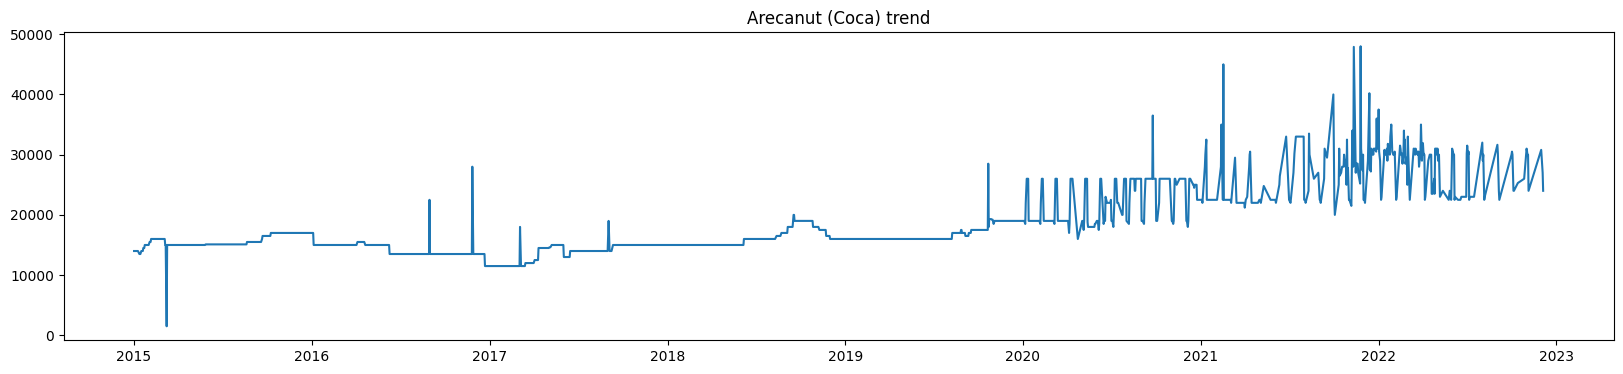

In [17]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Arecanut (Coca) trend')
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler 

scaler_coca = MinMaxScaler(feature_range=(0,1))

In [19]:
df_coca1 = df_test.drop('Arrivals',axis=1)

In [20]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [21]:
# df_coca1 = df_coca1.drop('Modal first difference',axis=1)

In [22]:
df_coca1

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [23]:
df_coca = df_coca1

In [24]:
df_coca

,Min,Max,Modal
Date,,,
2015-01-01,8900,16000,14000
2015-01-02,8900,16000,14000
2015-01-03,8900,16000,14000
2015-01-05,8900,16000,14000
2015-01-06,8900,16000,14000
...,...,...,...
2022-11-04,25000,34000,30000
2022-11-05,20000,25000,24000
2022-12-01,26000,31000,30800


In [59]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_coca[columns_to_scale] = scaler_coca.fit_transform(df_coca[columns_to_scale])

In [60]:
#df_coca.drop('Modal first difference',axis=1,inplace=True)

In [61]:
#df_coca.drop('Arrivals',axis=1,inplace=True)

In [62]:
df_coca.head(10)

,Min,Max,Modal
Date,,,
2015-01-01,0.194301,0.026455,0.268817
2015-01-02,0.194301,0.026455,0.268817
2015-01-03,0.194301,0.026455,0.268817
2015-01-05,0.194301,0.026455,0.268817
2015-01-06,0.194301,0.026455,0.268817
2015-01-07,0.191710,0.026455,0.268817
2015-01-08,0.191710,0.026455,0.268817
2015-01-09,0.191710,0.026455,0.268817
2015-01-12,0.194301,0.026455,0.258065


In [63]:
df_coca.tail()

,Min,Max,Modal
Date,,,
2022-11-04,0.611399,0.502646,0.612903
2022-11-05,0.481865,0.264550,0.483871
2022-12-01,0.637306,0.423280,0.630108
2022-12-04,0.549223,0.407407,0.548387
2022-12-05,0.481865,0.264550,0.483871


In [64]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2] 
        y.append(label)
    return np.array(X), np.array(y)

In [65]:
WINDOW_SIZE = 3 
X_coca, y_coca= df_to_X_y(df_coca,WINDOW_SIZE)
X_coca.shape, y_coca.shape

((1864, 3, 3), (1864, 3))

In [66]:
train_size = int(len(df_test)*0.8)
val_size = int((len(df_test) - train_size)*0.7)
test_size = len(df_test) - (train_size + val_size)

print(train_size, val_size ,test_size)

1493 261 113


In [67]:
y_coca

array([[0.19430052, 0.02645503, 0.2688172 ],
       [0.19430052, 0.02645503, 0.2688172 ],
       [0.19170984, 0.02645503, 0.2688172 ],
       ...,
       [0.6373057 , 0.42328042, 0.63010753],
       [0.5492228 , 0.40740741, 0.5483871 ],
       [0.48186528, 0.26455026, 0.48387097]])

### 1105 - 2019[start]
### 1740 - 2022[start]

In [68]:
X_train, y_train = X_coca[:1500], y_coca[:1500]
X_val, y_val = X_coca[1500:1750], y_coca[1500:1750]
X_test, y_test = X_coca[1750:] ,y_coca[1750:] 


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1500, 3, 3), (1500, 3), (250, 3, 3), (250, 3), (114, 3, 3), (114, 3))

In [69]:
model_coca=Sequential()
model_coca.add(InputLayer((3,3))),
model_coca.add(LSTM(64)),
model_coca.add(Dense(64, 'relu')),
model_coca.add(Dense(30, 'relu')),
model_coca.add(Dense(3)),



model_coca.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,611 (92.23 KB)

 Trainable params: 23,611 (92.23 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model_coca.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

### Adding Callbacks and Early Stopping

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/Coca/coca_model.keras")
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

### Tensorboard Logs

In [72]:
import os
root_logdir = os.path.join('models','Coca','coca_model_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


In [73]:
hist_coca = model_coca.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=2, callbacks=[checkpoint_cb, earlystopping_cb, tensorboard_cb])

Epoch 1/100
47/47 - 3s - 74ms/step - loss: 0.0589 - mean_absolute_error: 0.2180 - val_loss: 0.2147 - val_mean_absolute_error: 0.4377
Epoch 2/100
47/47 - 0s - 9ms/step - loss: 0.0409 - mean_absolute_error: 0.1827 - val_loss: 0.1646 - val_mean_absolute_error: 0.3803
Epoch 3/100
47/47 - 0s - 7ms/step - loss: 0.0242 - mean_absolute_error: 0.1396 - val_loss: 0.1157 - val_mean_absolute_error: 0.3101
Epoch 4/100
47/47 - 0s - 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0865 - val_loss: 0.0717 - val_mean_absolute_error: 0.2255
Epoch 5/100
47/47 - 0s - 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0423 - val_loss: 0.0478 - val_mean_absolute_error: 0.1676
Epoch 6/100
47/47 - 0s - 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0403 - val_mean_absolute_error: 0.1487
Epoch 7/100
47/47 - 0s - 8ms/step - loss: 0.0019 - mean_absolute_error: 0.0316 - val_loss: 0.0384 - val_mean_absolute_error: 0.1438
Epoch 8/100
47/47 - 0s - 8ms/step - loss: 0.0019 - mean_absolute_error: 0.

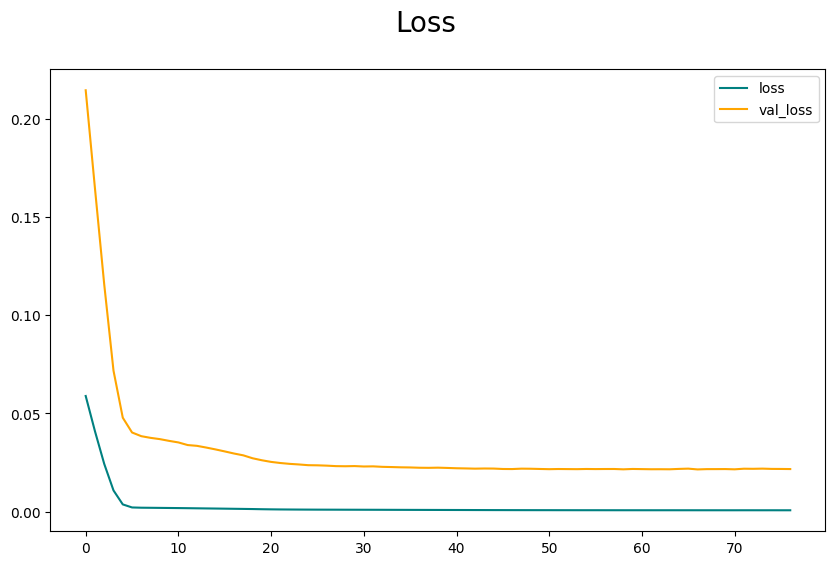

In [74]:
plt.figure(figsize=(10,6))
plt.plot(hist_coca.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_coca.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [77]:
X_train.shape

(1500, 3, 3)

In [78]:
train_predictions = model_coca.predict(X_train, verbose=0)

In [79]:
train_predictions

array([[0.19413   , 0.03669192, 0.26925805],
       [0.19413   , 0.03669192, 0.26925805],
       [0.19413   , 0.03669192, 0.26925805],
       ...,
       [0.5141622 , 0.31879297, 0.5182806 ],
       [0.46058938, 0.27847224, 0.4655483 ],
       [0.40526465, 0.24095061, 0.4172142 ]], dtype=float32)

In [80]:
train_predictions.shape
#train_prediction

(1500, 3)

In [81]:
y_train.shape

(1500, 3)

In [82]:
y_train_pred = scaler_coca.inverse_transform(train_predictions)
y_train_pred.shape

(1500, 3)

In [83]:
y_train_pred

array([[0.19413   , 0.03669192, 0.26925805],
       [0.19413   , 0.03669192, 0.26925805],
       [0.19413   , 0.03669192, 0.26925805],
       ...,
       [0.5141622 , 0.31879297, 0.5182806 ],
       [0.46058938, 0.27847224, 0.4655483 ],
       [0.40526465, 0.24095061, 0.4172142 ]], dtype=float32)

In [84]:
x = pd.DataFrame({'Train predictions(scaled)':train_predictions.flatten(),
                  'Train_prediction (inverse_transformed)':y_train_pred.flatten(),
                  'Actual':scaler_coca.inverse_transform(y_train).flatten()})

x.head(20)

,Train predictions(scaled),Train_prediction (inverse_transformed),Actual
0,0.194130,0.194130,0.194301
1,0.036692,0.036692,0.026455
2,0.269258,0.269258,0.268817
3,0.194130,0.194130,0.194301
4,0.036692,0.036692,0.026455
5,0.269258,0.269258,0.268817
6,0.194130,0.194130,0.191710
7,0.036692,0.036692,0.026455
8,0.269258,0.269258,0.268817
9,0.193422,0.193422,0.191710


In [85]:
X_train.shape, y_train.shape

((1500, 3, 3), (1500, 3))

In [86]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')

Mean absolute error for Train prediction is 0.011479861853425448
-------------------------------------------------------------------------------------
r2 for Train prediction is 82.55870244554009
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.194130    0.194301        0.036692    0.026455          0.269258   
1        0.194130    0.194301        0.036692    0.026455          0.269258   
2        0.194130    0.191710        0.036692    0.026455          0.269258   
3        0.193422    0.191710        0.036589    0.026455          0.269217   
4        0.192588    0.191710        0.036560    0.026455          0.269250   
5        0.191689    0.194301        0.036604    0.026455          0.269340   
6        0.192902    0.194301        0.036593    0.026455          0.267290   
7        0.194302    0.194301        0.036391    0.026455          0.265130   
8      

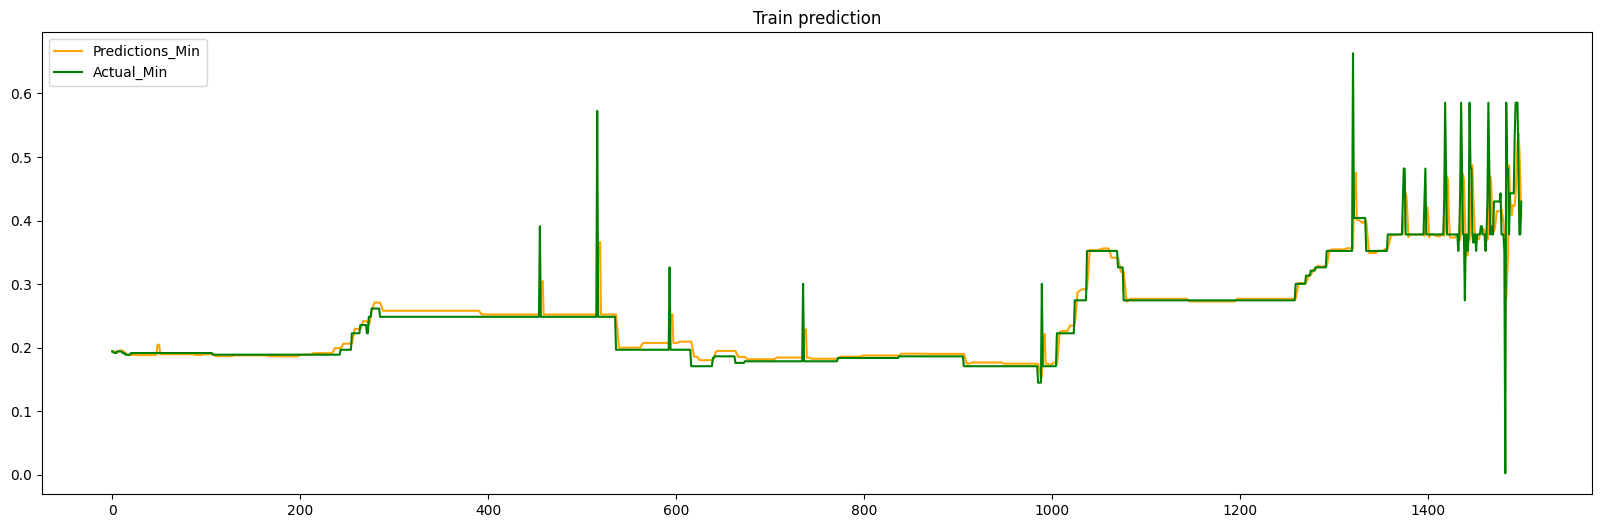

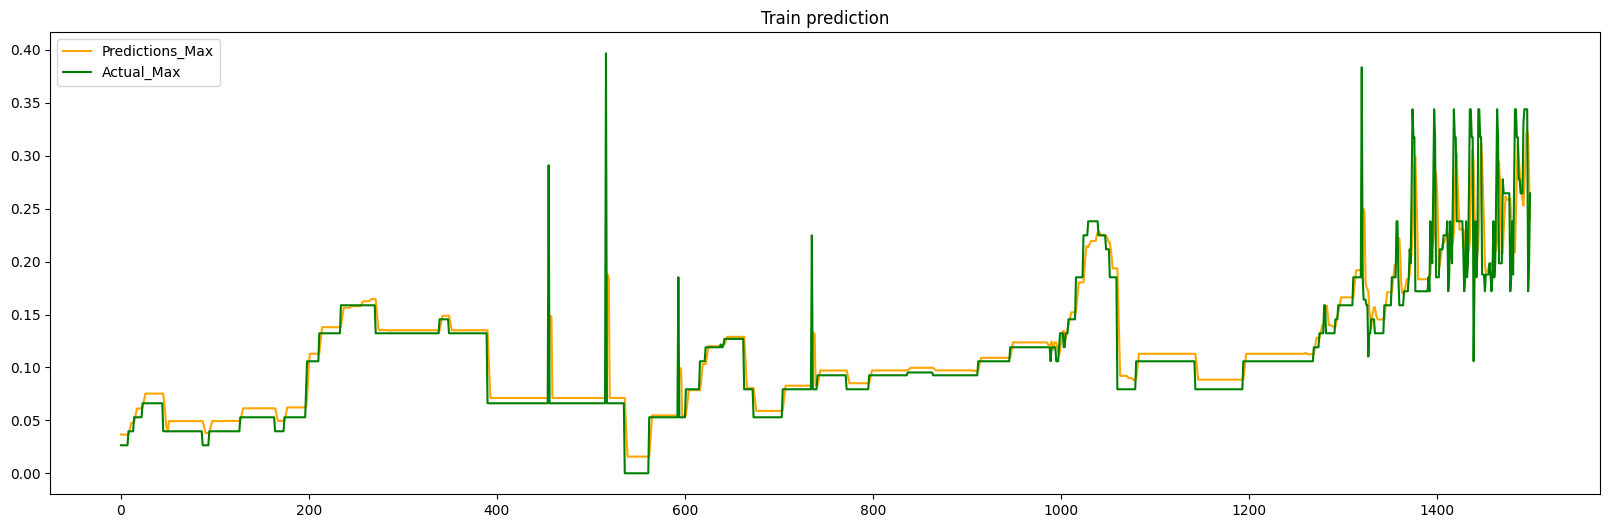

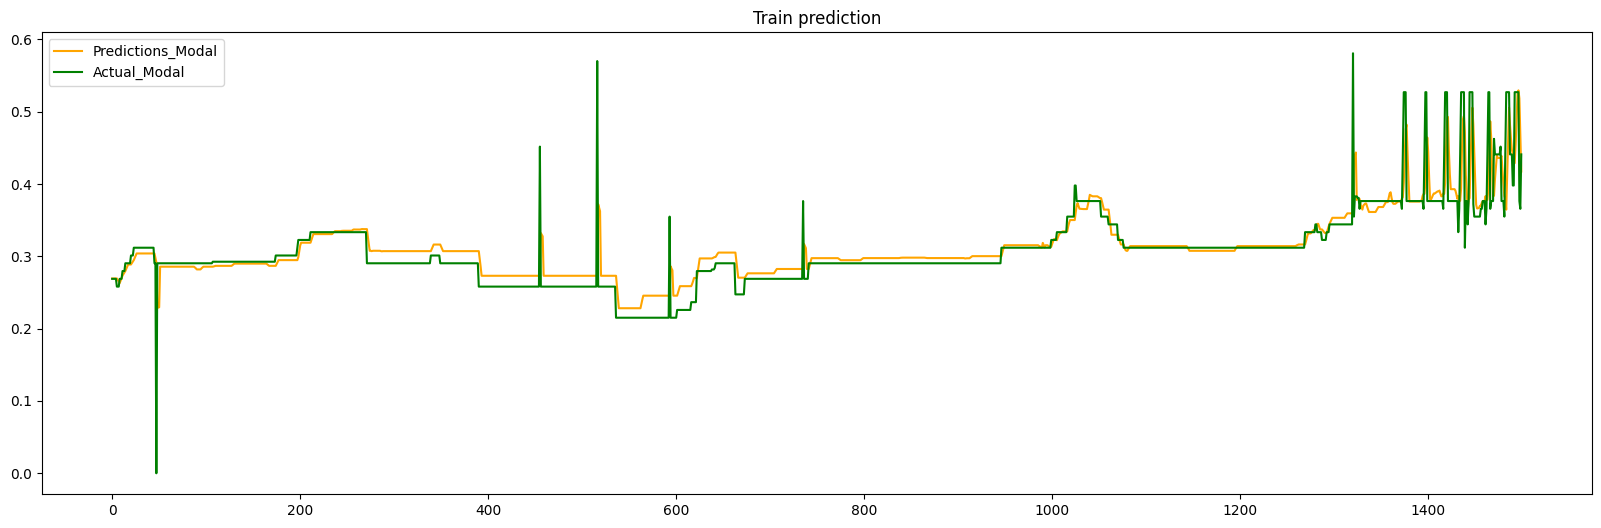

In [87]:
plot_predictions(model_coca, X_train, y_train, start=0, end=len(X_train), tag='Train prediction')

Mean absolute error for Val prediction is 0.09407687307694769
-------------------------------------------------------------------------------------
r2 for Val prediction is 7.9389582579048446
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.391600    0.481865        0.219624    0.343915          0.399102   
1        0.413496    0.481865        0.260505    0.317460          0.440193   
2        0.443095    0.378238        0.290025    0.317460          0.475552   
3        0.436542    0.585492        0.299039    0.343915          0.482058   
4        0.455254    0.481865        0.305176    0.343915          0.493936   
5        0.456971    0.481865        0.308380    0.317460          0.495661   
6        0.487207    0.481865        0.311395    0.291005          0.505443   
7        0.457347    0.481865        0.298815    0.291005          0.486264   
8        0.

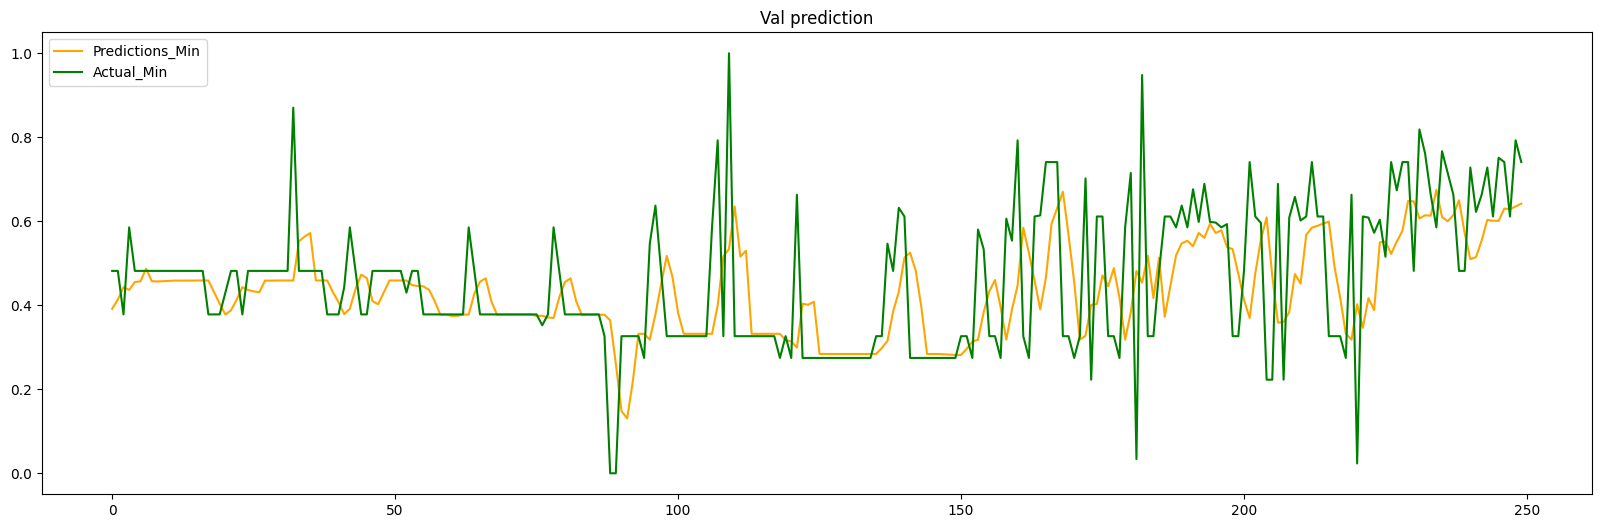

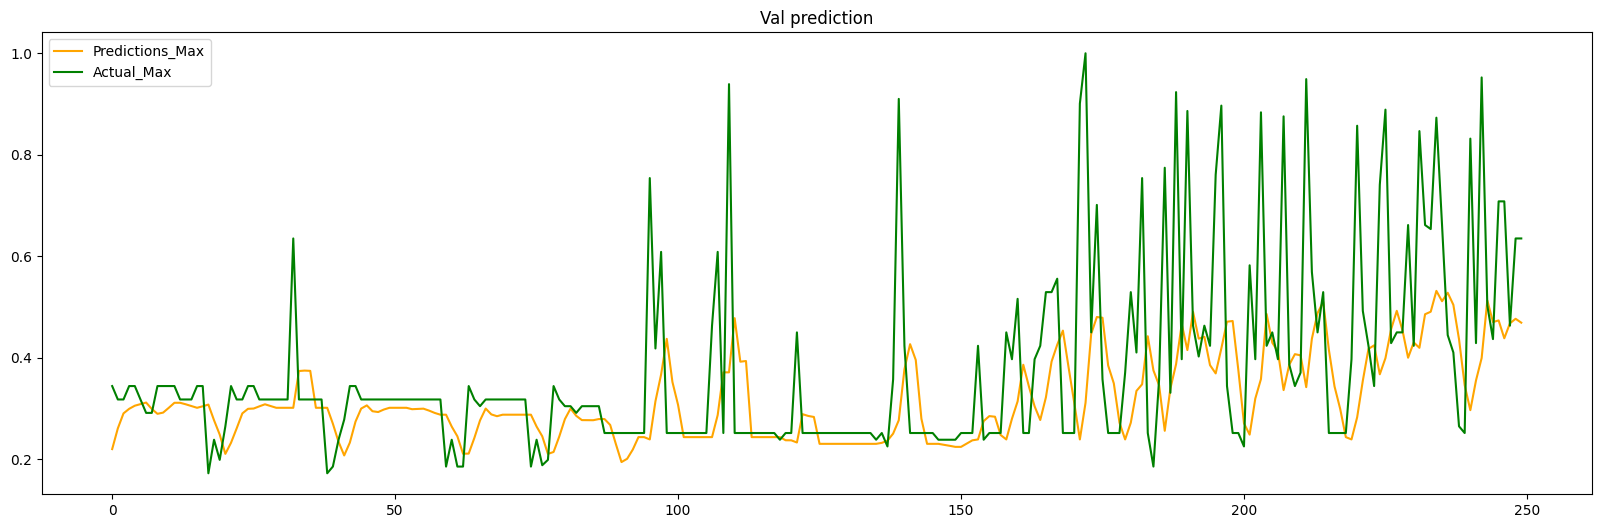

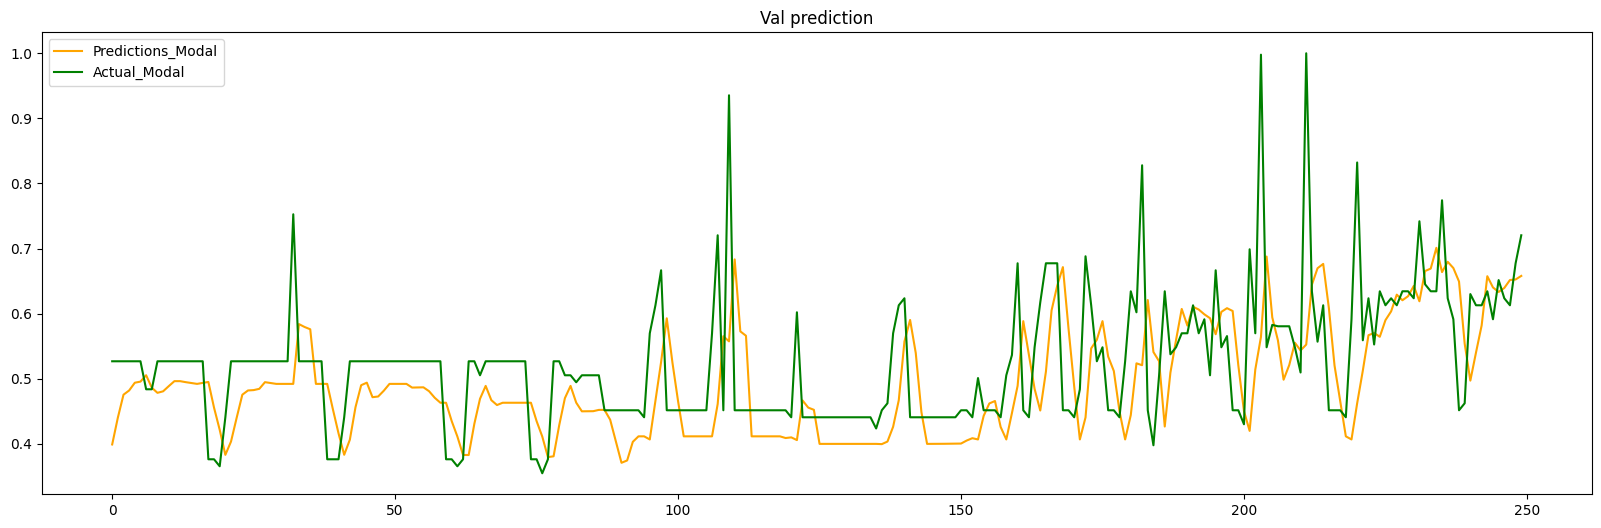

In [88]:
plot_predictions(model_coca, X_val, y_val, start=0, end=len(X_val), tag='Val prediction')

Mean absolute error for Test prediction is 0.08966548500965886
-------------------------------------------------------------------------------------
r2 for Test prediction is -12.23490659826021
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.645423    0.792746        0.463878    0.634921          0.668426   
1        0.697084    0.740933        0.502166    0.423280          0.705052   
2        0.681224    0.704663        0.469814    0.476190          0.678805   
3        0.673421    0.611399        0.435868    0.634921          0.652003   
4        0.627399    0.663212        0.417909    0.476190          0.625409   
5        0.600514    0.481865        0.425930    0.264550          0.618734   
6        0.539751    0.481865        0.379549    0.251323          0.558728   
7        0.506475    0.624352        0.311632    0.816667          0.505847   
8        

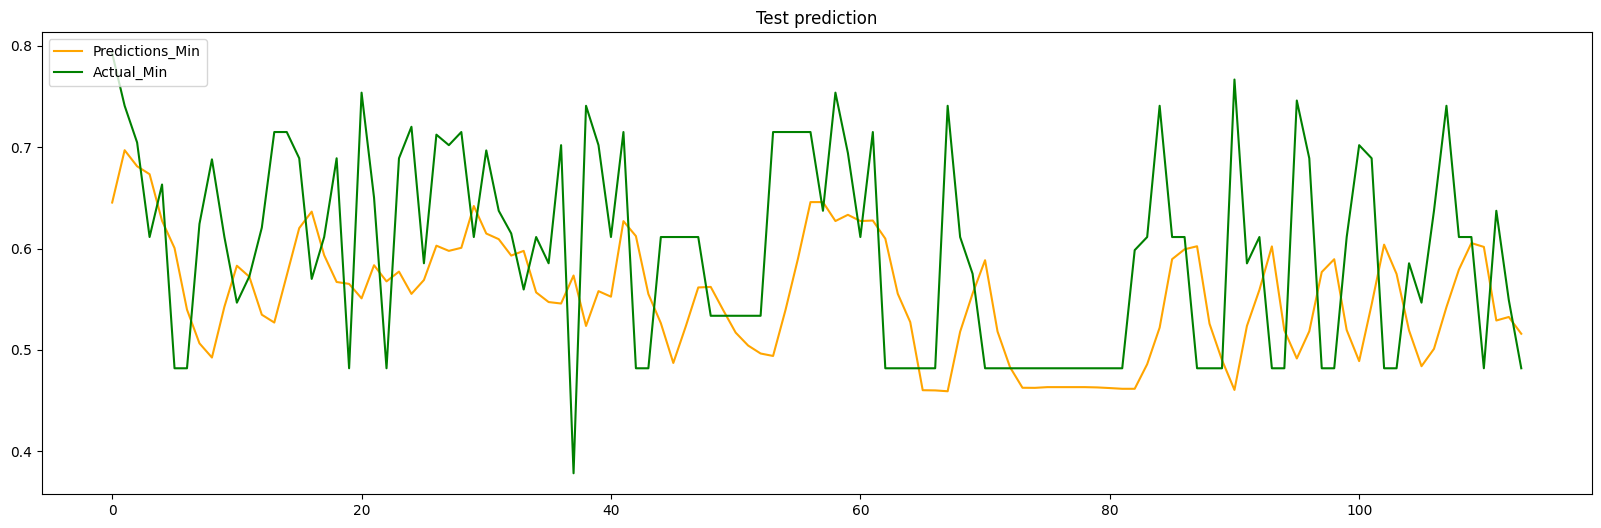

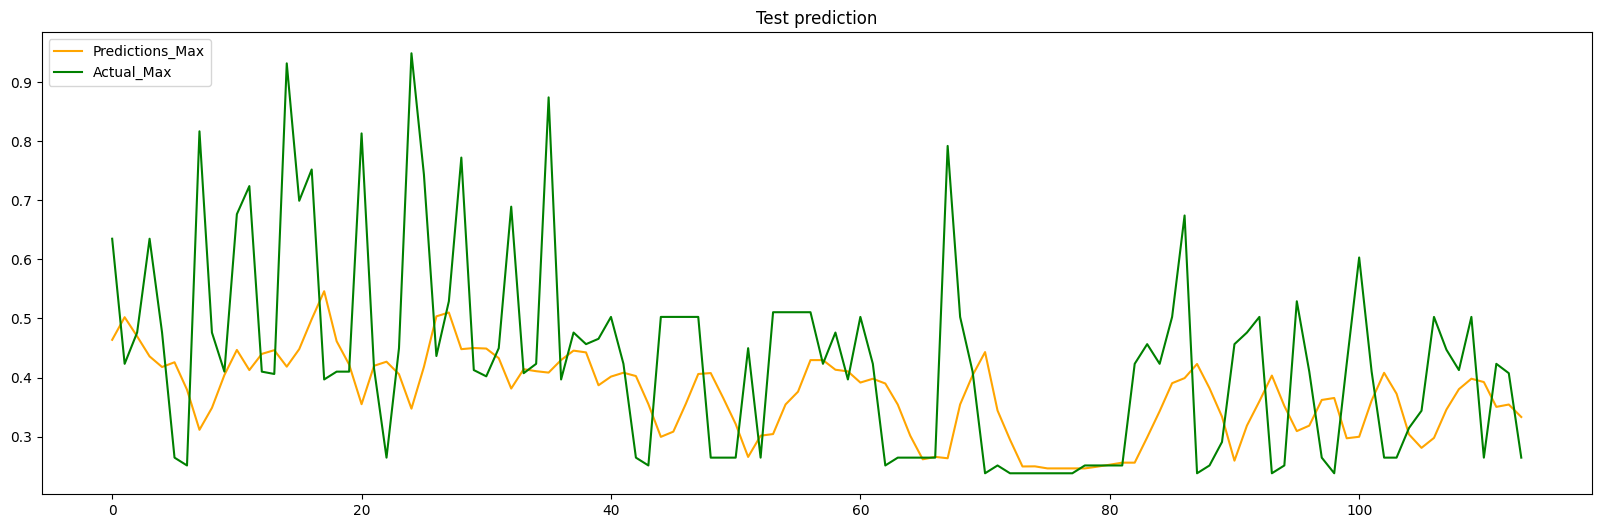

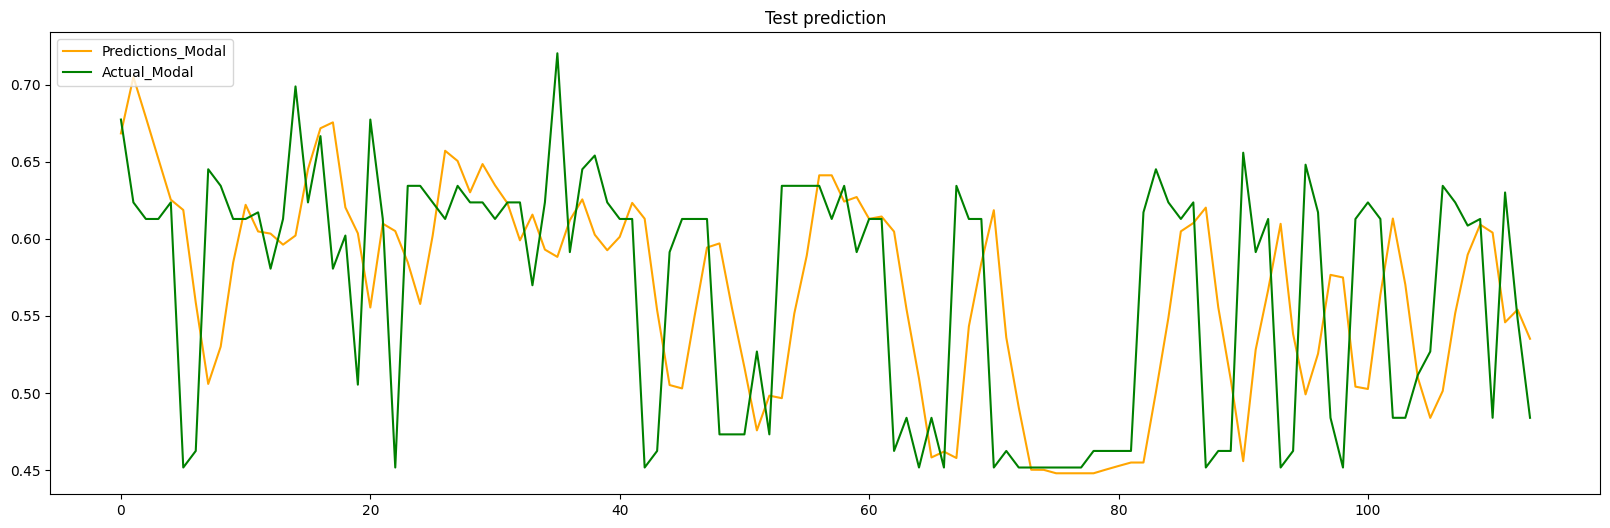

In [89]:
plot_predictions(model_coca, X_test, y_test, start=0, end=len(X_test), tag='Test prediction')

Already saved during training

In [62]:
# from tensorflow.keras.models import save_model

# # Assuming 'model_coca' is your trained Keras model
# model_coca.save('models\Coca\model_coca(3,3) 83.138.keras')

In [91]:
from tensorflow.keras.models import load_model

model_bestmodel = load_model('models\Coca\coca_model.keras')

In [92]:
import joblib

joblib.dump(scaler_coca,'./Scaler Objects/scaler_coca.pkl')

['./Scaler Objects/scaler_coca.pkl']

### Recursive prediction for next 31 days

In [93]:
recursive_prediction = []

last_batch = X_test[-3,:,:].copy()

for i in range(31):
    reshaped_data = last_batch.reshape(1,last_batch.shape[0],last_batch.shape[1]) 
    next_day_prediction = model_bestmodel.predict(reshaped_data,verbose=0)
    recursive_prediction.append(next_day_prediction)
    last_batch[-1] = next_day_prediction

In [94]:
for j in recursive_prediction:
    print(j)

[[0.526903  0.342525  0.5398457]]
[[0.5391657  0.3578117  0.55728465]]
[[0.5425788  0.36143905 0.5620246 ]]
[[0.54352474 0.36236784 0.5632934 ]]
[[0.5437853  0.36261332 0.56363446]]
[[0.5438568  0.36267912 0.56372666]]
[[0.54387635 0.36269692 0.5637517 ]]
[[0.5438817  0.36270174 0.56375855]]
[[0.54388297 0.36270308 0.5637602 ]]
[[0.54388356 0.36270335 0.5637608 ]]
[[0.54388374 0.3627035  0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.54388374 0.36270347 0.563761  ]]
[[0.54388374 0.36270347 0.56376106]]
[[0.

In [67]:
for k in recursive_prediction:
    k = scaler_coca.inverse_transform(k) 
    print(k)

[[22042.688 28957.291 27400.715]]
[[22795.52  30278.95  28489.064]]
[[23069.025 30720.902 28847.559]]
[[23167.375 30868.81  28967.744]]
[[23202.438 30918.377 29008.459]]
[[23214.854 30935.025 29022.33 ]]
[[23219.227 30940.627 29027.076]]
[[23220.764 30942.514 29028.697]]
[[23221.295 30943.154 29029.248]]
[[23221.479 30943.371 29029.443]]
[[23221.545 30943.443 29029.504]]
[[23221.568 30943.467 29029.53 ]]
[[23221.574 30943.475 29029.535]]
[[23221.576 30943.477 29029.54 ]]
[[23221.578 30943.477 29029.543]]
[[23221.58  30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30943.479 29029.545]]
[[23221.578 30